In [3]:
from __future__ import print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

First Order Finite Difference

0.6613879270715355 = 0.6613879270715354


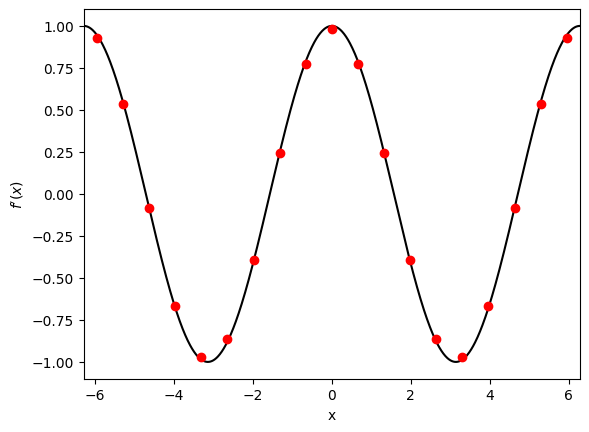

In [ ]:
# First Order Derivative

f = lambda x: np.sin(x)
f_prime = lambda x: np.cos(x)

# Use uniform discretization. 

x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
N = 20
x_hat = np.linspace(-2 * np.pi, 2 * np.pi, N)
delta_x = x_hat[1] - x_hat[0]
print("%s = %s" % (delta_x, (x_hat[-1] - x_hat[0]) / (N-1)))

# Compute forward difference by using a for loop. 

f_prime_hat = np.empty(x_hat.shape)
for i in range(N-1):
    f_prime_hat[i] = (f(x_hat[i+1]) - f(x_hat[i])) / delta_x
f_prime_hat[-1] = (f(x_hat[i]) - f(x_hat[i-1])) / delta_x

# Use first order differences for the points on the edge of the domain. 
# This is the backward distance for x_n.

f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x
fig = plt.figure()
axes = fig.add_subplot(1,1,1)

axes.plot(x, f_prime(x), 'k')
axes.plot(x_hat + 0.5  * delta_x, f_prime_hat, 'ro')
axes.set_xlim((x[0], x[-1]))
axes.set_ylim((-1.1, 1.1))
axes.set_xlabel("x")
axes.set_ylabel(r"$f'(x)$")
plt.show()

Second Order Finite Difference

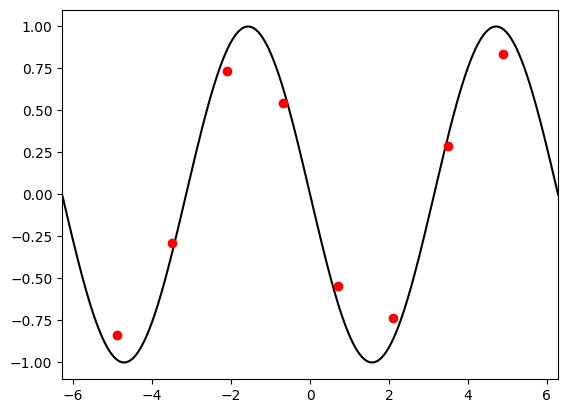

In [2]:
f = lambda x: np.sin(x)
f_dubl_prime = lambda x: -np.sin(x)

# Use uniform discretization
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
N = 10
x_hat = np.linspace(-2 * np.pi, 2 * np.pi, N)
delta_x = x_hat[1] - x_hat[0]

# Compute derivative
f_dubl_prime_hat = np.empty(x_hat.shape)
f_dubl_prime_hat[1:-1] = (f(x_hat[2:]) -2.0 * f(x_hat[1:-1]) + f(x_hat[:-2])) / (delta_x**2)

# Use first-order differences for points at edge of domain
f_dubl_prime_hat[0] = (2.0 * f(x_hat[0]) - 5.0 * f(x_hat[1]) + 4.0 * f(x_hat[2]) - f(x_hat[3])) / delta_x**2
f_dubl_prime_hat[-1] = (2.0 * f(x_hat[-1]) - 5.0 * f(x_hat[-2]) + 4.0 * f(x_hat[-3]) - f(x_hat[-4])) / delta_x**2

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_dubl_prime(x), 'k')
axes.plot(x_hat, f_dubl_prime_hat, 'ro')
axes.set_xlim((x[0], x[-1]))
axes.set_ylim((-1.1, 1.1))

plt.show()

General Finite Difference

In [4]:
def finite_difference(k, x_bar, x):
    N = x.shape[0]
    A = np.ones((N, N))
    x_row = x - x_bar
    for i in range(1, N):
        A[i, :] = x_row ** i / scipy.special.factorial(i)
    b = np.zeros(N)
    b[k] = 1.0 
    c = np.linalg.solve(A, b)
    return c

print(finite_difference(2, 0.0, np.asarray([-1.0, 0.0, 1.0])))
print(finite_difference(1, 0.0, np.asarray([-1.0, 0.0, 1.0])))
print(finite_difference(1, -2.0, np.asarray([-2.0, -1.0, 0.0, 1.0, 2.0])))
print(finite_difference(2, 0.0, np.asarray([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0])) * 12)

[ 1. -2.  1.]
[-0.5  0.   0.5]
[-2.08333333  4.         -3.          1.33333333 -0.25      ]
[ 10. -15.  -4.  14.  -6.   1.]


Error Analysis

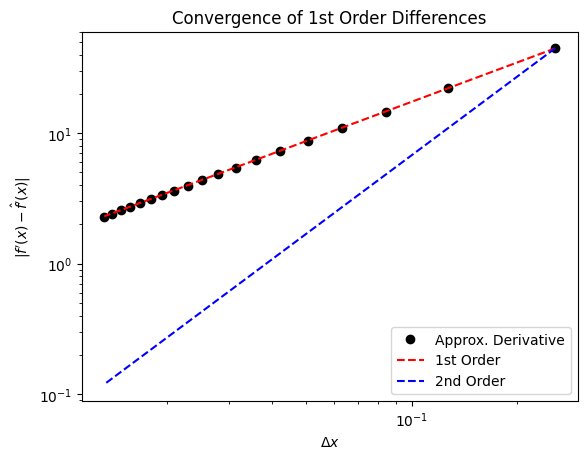

In [5]:
f = lambda x: np.sin(x) + x**2 + 3.0 * x**3
f_prime = lambda x: np.cos(x) + 2.0 * x + 9.0 * x**2

# Compute the error as a function of delta_x
delta_x = []
error = []
# for N in xrange(2, 101):
for N in range(50, 1000, 50):
    x_hat = np.linspace(-2 * np.pi, 2 * np.pi, N)
    delta_x.append(x_hat[1] - x_hat[0])

    # Compute forward difference
    f_prime_hat = np.empty(x_hat.shape)
    f_prime_hat[:-1] = (f(x_hat[1:]) - f(x_hat[:-1])) / (delta_x[-1])

    # Use first-order differences for points at edge of domain
    f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x[-1]  # Backward Difference at x_N
    
    error.append(np.linalg.norm(np.abs(f_prime(x_hat + delta_x[-1]) - f_prime_hat), ord=np.infty))
    
error = np.array(error)
delta_x = np.array(delta_x)
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_x, error, 'ko', label="Approx. Derivative")

order_C = lambda delta_x, error, order: np.exp(np.log(error) - order * np.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error[0], 1.0) * delta_x**1.0, 'r--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
axes.legend(loc=4)
axes.set_title("Convergence of 1st Order Differences")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")


plt.show()

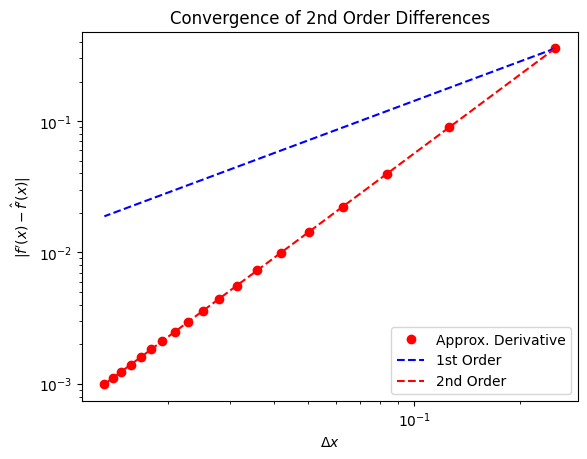

In [7]:
f = lambda x: np.sin(x) + x**2 + 3.0 * x**3
f_prime = lambda x: np.cos(x) + 2.0 * x + 9.0 * x**2

# Compute the error as a function of delta_x
delta_x = []
error = []

# for N in xrange(2, 101):
for N in range(50, 1000, 50):
    x_hat = np.linspace(-2 * np.pi, 2 * np.pi, N + 1)
    delta_x.append(x_hat[1] - x_hat[0])

    # Compute derivative
    f_prime_hat = np.empty(x_hat.shape)
    f_prime_hat[1:-1] = (f(x_hat[2:]) - f(x_hat[:-2])) / (2 * delta_x[-1])

    # Use first-order differences for points at edge of domain
#     f_prime_hat[0] = (f(x_hat[1]) - f(x_hat[0])) / delta_x[-1]  
#     f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x[-1]
    # Use second-order differences for points at edge of domain
    f_prime_hat[0] =  (-3.0 * f(x_hat[0])  +  4.0 * f(x_hat[1])  + - f(x_hat[2]))  / (2.0 * delta_x[-1])
    f_prime_hat[-1] = ( 3.0 * f(x_hat[-1]) + -4.0 * f(x_hat[-2]) +   f(x_hat[-3])) / (2.0 * delta_x[-1])
    
    error.append(np.linalg.norm(np.abs(f_prime(x_hat) - f_prime_hat), ord=np.infty))
    
error = np.array(error)
delta_x = np.array(delta_x)
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_x, error, "ro", label="Approx. Derivative")

order_C = lambda delta_x, error, order: np.exp(np.log(error) - order * np.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error[0], 1.0) * delta_x**1.0, 'b--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 2.0) * delta_x**2.0, 'r--', label="2nd Order")
axes.legend(loc=4)
axes.set_title("Convergence of 2nd Order Differences")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")

plt.show()

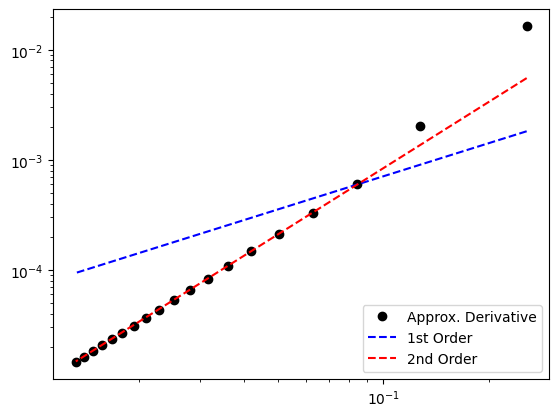

In [8]:
f = lambda x: np.sin(x) + x**2 + 3.0 * x**3
f_dubl_prime = lambda x: -np.sin(x) + 2.0 + 18.0 * x

# Compute the error as a function of delta_x
delta_x = []
error = []
# for N in xrange(2, 101):
for N in range(50, 1000, 50):
    x_hat = np.linspace(-2 * np.pi, 2 * np.pi, N)
    delta_x.append(x_hat[1] - x_hat[0])

    # Compute derivative
    f_dubl_prime_hat = np.empty(x_hat.shape)
    f_dubl_prime_hat[1:-1] = (f(x_hat[2:]) -2.0 * f(x_hat[1:-1]) + f(x_hat[:-2])) / (delta_x[-1]**2)

    # Use second-order differences for points at edge of domain
    f_dubl_prime_hat[0] = (2.0 * f(x_hat[0]) - 5.0 * f(x_hat[1]) + 4.0 * f(x_hat[2]) - f(x_hat[3])) / delta_x[-1]**2
    f_dubl_prime_hat[-1] = (2.0 * f(x_hat[-1]) - 5.0 * f(x_hat[-2]) + 4.0 * f(x_hat[-3]) - f(x_hat[-4])) / delta_x[-1]**2
    
    error.append(np.linalg.norm(np.abs(f_dubl_prime(x_hat) - f_dubl_prime_hat), ord=np.infty))
    
error = np.array(error)
delta_x = np.array(delta_x)
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

# axes.plot(delta_x, error)
axes.loglog(delta_x, error, "ko", label="Approx. Derivative")
order_C = lambda delta_x, error, order: np.exp(np.log(error) - order * np.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[2], error[2], 1.0) * delta_x**1.0, 'b--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[2], error[2], 2.0) * delta_x**2.0, 'r--', label="2nd Order")
axes.legend(loc=4)

plt.show()